# 线性回归

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 生成数据集

In [6]:
def synthetic_data(w, b, num_examples):

    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print('features:', features[0], '\nlabel', labels[0])

features: tensor([ 2.4119, -0.1350]) 
label tensor([9.4912])


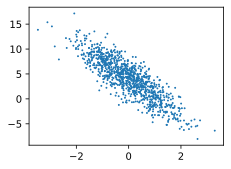

In [8]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)